In [90]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import scipy.stats as ss

from collections import Counter
import math

# Работа с данными (к лаб. 1)

Загружаем датасет

In [91]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
n_train = train_df.shape[0]
n_test = test_df.shape[0]
print(f'{n_train=}')
print(f'{n_test=}')
df = train_df.append(test_df, ignore_index=True)
df.head()

n_train=103904
n_test=25976


,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


Сразу отбрасываем ненужные столбцы с id записи потому что они не несут никакой полезной информации для определения будет ли удовлетворен клиент или нет

In [92]:
df = df.drop(['Unnamed: 0', 'id'], axis='columns')

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             129880 non-null  object 
 1   Customer Type                      129880 non-null  object 
 2   Age                                129880 non-null  int64  
 3   Type of Travel                     129880 non-null  object 
 4   Class                              129880 non-null  object 
 5   Flight Distance                    129880 non-null  int64  
 6   Inflight wifi service              129880 non-null  int64  
 7   Departure/Arrival time convenient  129880 non-null  int64  
 8   Ease of Online booking             129880 non-null  int64  
 9   Gate location                      129880 non-null  int64  
 10  Food and drink                     129880 non-null  int64  
 11  Online boarding                    1298

В датасете представлено 5 категориальных признаков, и 18 численных

In [94]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,129880.0,39.427957,15.119360,7.0,27.0,40.0,51.0,85.0
Flight Distance,129880.0,1190.316392,997.452477,31.0,414.0,844.0,1744.0,4983.0
Inflight wifi service,129880.0,2.728696,1.329340,0.0,2.0,3.0,4.0,5.0
Departure/Arrival time convenient,129880.0,3.057599,1.526741,0.0,2.0,3.0,4.0,5.0
Ease of Online booking,129880.0,2.756876,1.401740,0.0,2.0,3.0,4.0,5.0
Gate location,129880.0,2.976925,1.278520,0.0,2.0,3.0,4.0,5.0
Food and drink,129880.0,3.204774,1.329933,0.0,2.0,3.0,4.0,5.0
Online boarding,129880.0,3.252633,1.350719,0.0,2.0,3.0,4.0,5.0
Seat comfort,129880.0,3.441361,1.319289,0.0,2.0,4.0,5.0,5.0
Inflight entertainment,129880.0,3.358077,1.334049,0.0,2.0,4.0,4.0,5.0


Смотрим есть ли колонки с уникальными значениями

In [95]:
print(f"unique value columns: {[col for col in df.columns if df[col].nunique() <= 1]}")

unique value columns: []


Смотрим есть ли дубликаты в записях

In [96]:
df.duplicated().sum()

0

Для каждой из колонок смотрим сколько в ней потеряных значений (NaN'ов)

In [97]:
# функция вернет датафрейм записями по каждму полю (общее число NaN'ов, процент NaN'ов от общего числа записей), для полей, у в которых есть хотя бы один NaN  
def missing_stats(df):
    missing = df.isna().sum().sort_values(ascending=False)
    missing = pd.concat([missing, missing / len(df) * 100], axis=1, keys=['Missing values', 'Missing percent'])
    return missing[missing['Missing values'] > 0.0]

missing_stats(df)

,Missing values,Missing percent
Arrival Delay in Minutes,393,0.302587


Пытаемся понять чем заменить пропущенные значения в колонке "Arrival Delay in Minutes". Для этого подсчитываем полетов без задержки прибытия

In [98]:
non_zero_arrival_delay_flights_count = (df["Arrival Delay in Minutes"] > 0).sum()
print(f'Non-zero arrival delay flights percent: {non_zero_arrival_delay_flights_count / len(df * 100)}')

Non-zero arrival delay flights percent: 0.43681860178626425


Видно, что подавляющее число полетов проходит без задержки прибытия, значит смело заменяем пропущенные значения нулем. Хотя, так как данных довольно много, можно было бы и отбросить "бракованные" записи

In [99]:
mode = df['Arrival Delay in Minutes'].mode()[0]
df['Arrival Delay in Minutes'] = df['Arrival Delay in Minutes'].fillna(mode)

# проверяем что все пропущенные значения теперь заполнены
missing_stats(df)

,Missing values,Missing percent


## Исследование данных

### Исследование целевой переменной

<AxesSubplot:xlabel='satisfaction', ylabel='count'>

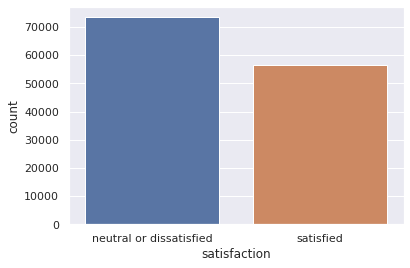

In [100]:
sns.countplot(x='satisfaction', data=df)

Видно, что недовольных или равнодушных клиентов больше, чем удовлетворенных. Однако дисбаланс классов небольшой.

### Числовые признаки

In [101]:
df_numerical = df.select_dtypes([np.number])
df_numerical = pd.concat([df['satisfaction'].map({'neutral or dissatisfied' : 0, 'satisfied' : 1}), df_numerical], axis=1)
df_numerical

,satisfaction,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,0,13,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0
1,0,25,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0
2,1,26,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0
3,0,25,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0
4,1,61,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,0,34,526,3,3,3,1,4,3,4,4,3,2,4,4,5,4,0,0.0
129876,1,23,646,4,4,4,4,4,4,4,4,4,5,5,5,5,4,0,0.0
129877,0,17,828,2,5,1,5,2,1,2,2,4,3,4,5,4,2,0,0.0
129878,1,14,1127,3,3,3,3,4,4,4,4,3,2,5,4,5,4,0,0.0


<Figure size 432x288 with 0 Axes>

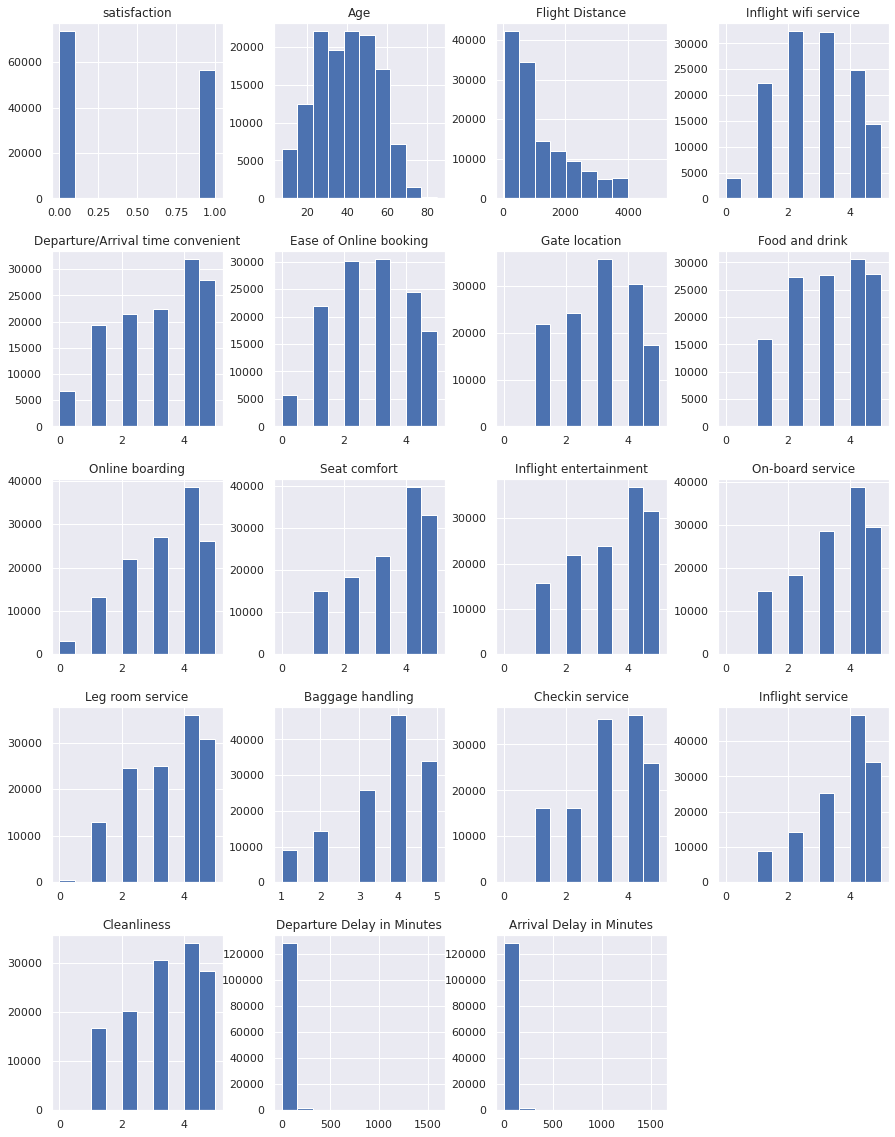

<Figure size 432x288 with 0 Axes>

In [102]:
df_numerical.hist(figsize=(15,20))
plt.figure()

- Возраст пассажииров, по всей видимости, имеет бимодальное распределение с пиками в районе 25 и 40 лет. Однако пасажиры возрасте от 40 до 60 лет преобладают.

- Распределение расстояния перелета похоже на экспонециально, но нужно уточнять.

- Задержки вылета и прибытия, похоже, в абсолютном большинстве случаев близки к нулю.

- Величины, обозначающие уровень удовлетворенности клиента той или иной отдельной характеристикой имеют сходства. Почти у всех из них очень мало нулевых оценок, и самая распространенная оценка 4 балла. Эти величины, наверняка, нормально распределены с перекосом в большую сторону. Нужно уточнять.

### Зависимость целевой переменной от числовых признаков

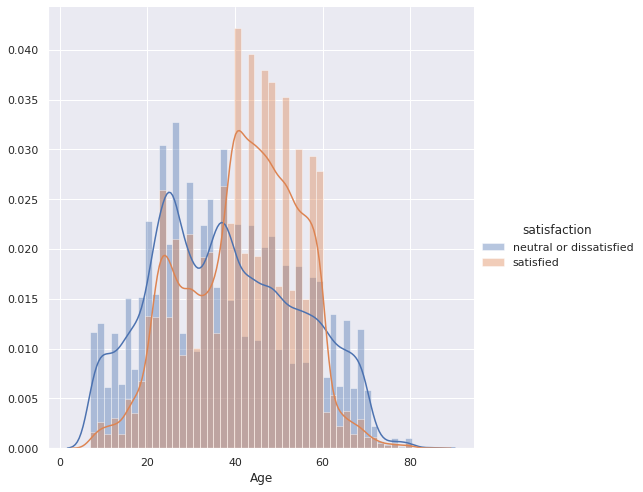

In [103]:
sns.FacetGrid(df, hue='satisfaction', height=7).map(sns.distplot, 'Age').add_legend()

Видно, что распределения по возрастам довольно сильно перекрываюся. Однако среди пассажиров с возрастом в диапазоне 8-40 больше недовольных, в диапазоне 40-60 довольных почти в 2 раза больше, чем недовольных, а в диапазоне 60-80 гораздо больше неудовлетворенных.

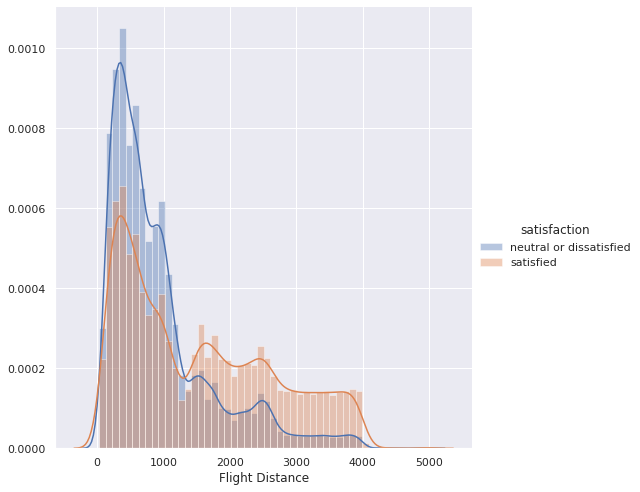

In [104]:
sns.FacetGrid(df, hue='satisfaction', height=7).map(sns.distplot, 'Flight Distance').add_legend()

Распределения сильно перекрываюся. Видно, что среди пассажиров, совершающих перелет на дистанцию примерно до 1200 км, но на дистанциях 1200-4000 км число довольных более чем вдвое превышает число недовольных

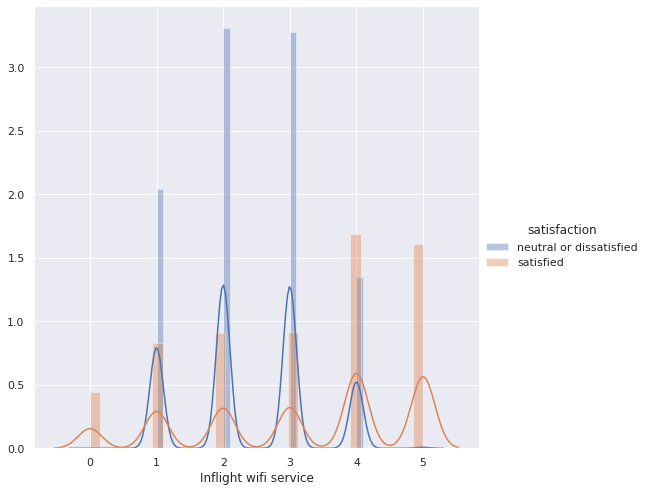

In [105]:
sns.FacetGrid(df, hue='satisfaction', height=7).map(sns.distplot, 'Inflight wifi service').add_legend()

- Как ни странно, если оценка wi-fi'я не применима, видимо ввиду его отсутствия ?? (в таблице оценка = 0), то пассажир почти гарантировано останется доволен полетом
- Пассажиры, поставившие 1, 2, или 3 гораздо чаще остаются недовольны и всем полетом в целом
- Среди пассажиров, поставивших 4 за эту характеристику совсем немного больше удовлетворенных полетом в целом
- Если пассажир поставил оценку 5 за эту характеристику, то он почти гарантированно удовлетворен полетом

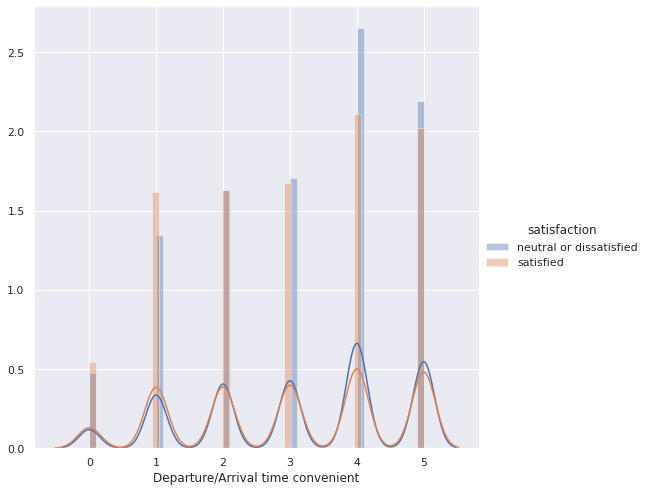

In [106]:
sns.FacetGrid(df, hue='satisfaction', height=7).map(sns.distplot, 'Departure/Arrival time convenient').add_legend()

Отдельно эта оценка почти не влияет на удовлетворенность клиента в целом, т.к. число довольных и недовольных почти равно для любого балла, разве что для 4-х неудовлетворенных слегка больше. Не очень информативный признак, вероятно можно отбросить ??

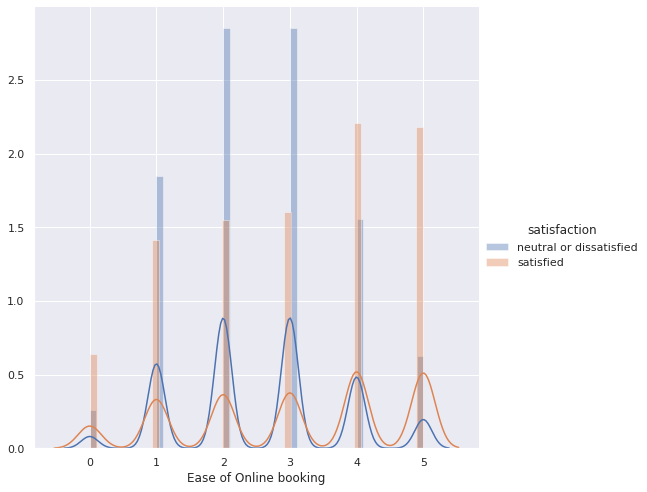

In [107]:
sns.FacetGrid(df, hue='satisfaction', height=7).map(sns.distplot, 'Ease of Online booking').add_legend()

- Если оценка не применима, то число довольных пассажиров в 2 раза превышает число недовольных
- Среди пассажиров, поставивших 1, немного больше недовольных
- Пассажиры, поставивщие оценки 2, 3 в два раза чаще недовольны
- Среди пассажиров, поставивших 4, немного больше довольных
- Среди пассажиров поставивших 5 гораздо больше оставшихся довольными

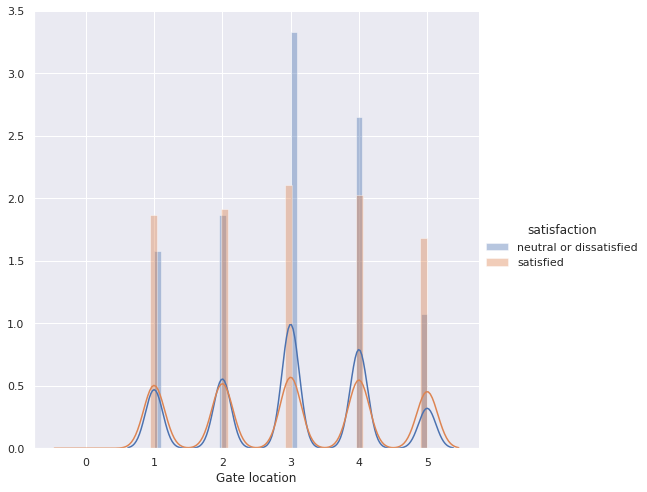

In [108]:
sns.FacetGrid(df, hue='satisfaction', height=7).map(sns.distplot, 'Gate location').add_legend()

- Число довольных и недовольных пассажиров, поставивших 0-2 примерно равно
- Среди поставивших 3 или 4 заметно больше недовольных
- Среди поставивших 5 больше довольных

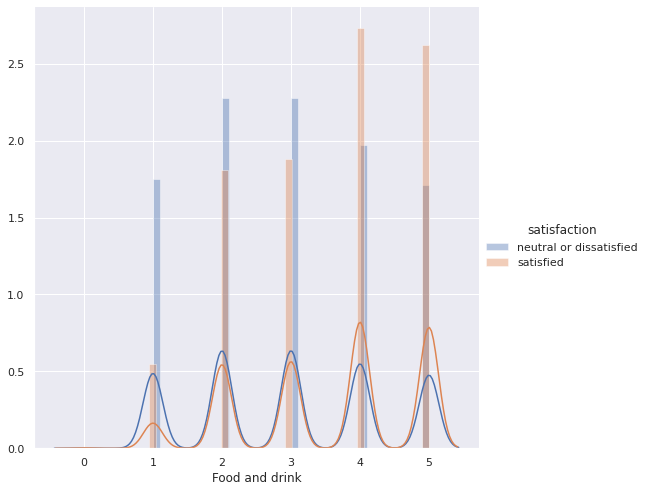

In [109]:
sns.FacetGrid(df, hue='satisfaction', height=7).map(sns.distplot, 'Food and drink').add_legend()

- Пассажир поставивший 1 с большой вероятностью останется недоволен полетом
- Поставившие 2-3 скорее недовольны, чем довольны
- Среди поставивших 4 или 5 заметно больше довольных

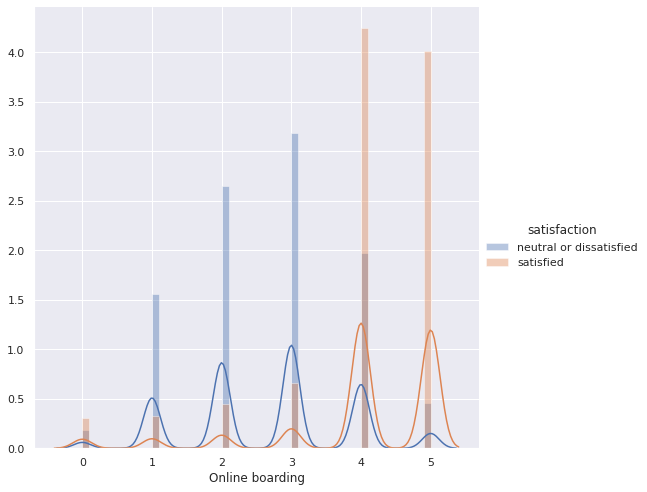

In [110]:
sns.FacetGrid(df, hue='satisfaction', height=7).map(sns.distplot, 'Online boarding').add_legend()

- Если пассажир поставил оценку 1-2 за эту характеристуку, то он большой вероятностью останется недоволен
- Пассажиры, поставившие 4, в 2 два раза чаще довольны
- Пассажир, поставивший 5, с огромной вероятностью останется доволен полетом

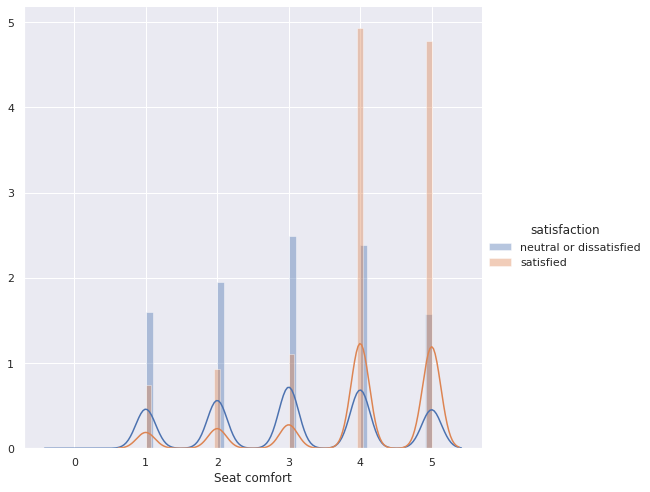

In [111]:
sns.FacetGrid(df, hue='satisfaction', height=7).map(sns.distplot, 'Seat comfort').add_legend()

- Пассажиры, поставившие 1-3 за эту характеристику в 2-х случаях из 3-х останутся недовольными
- Напротив, пассажиры, поставившие 4-5 более, чем в 2 раза чаще оказываются довольны полетом

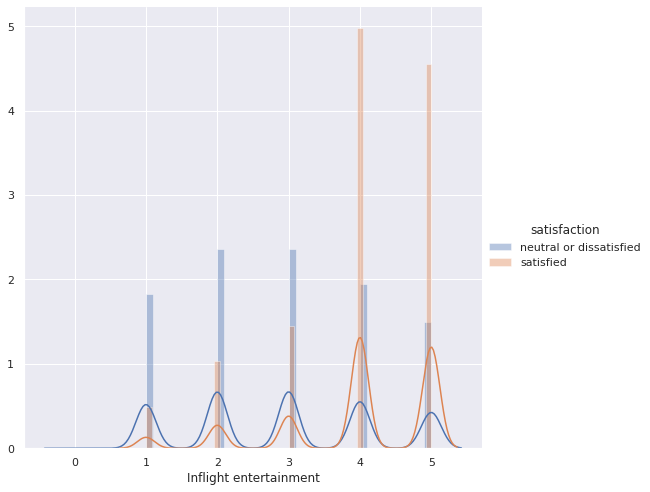

In [112]:
sns.FacetGrid(df, hue='satisfaction', height=7).map(sns.distplot, 'Inflight entertainment').add_legend()

- Пассажиры, поставившие 1-3 за эту характеристику примерно в 2 раза чаще останутся недовольными
- Пассажиры, поставившие 4-5 более, чем в 2 раза чаще оказываются довольны полетом

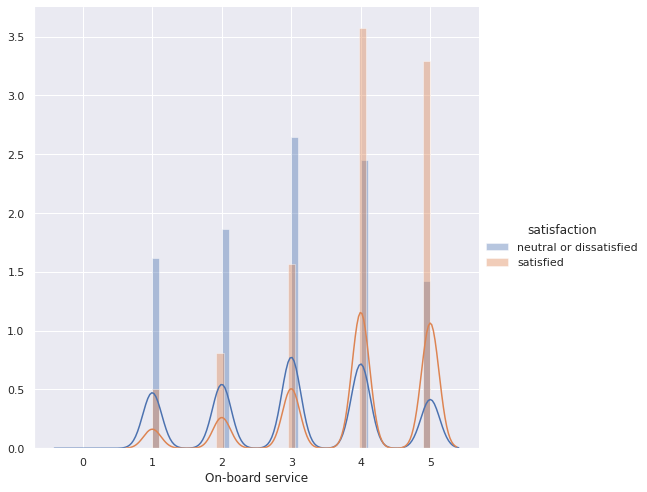

In [113]:
sns.FacetGrid(df, hue='satisfaction', height=7).map(sns.distplot, 'On-board service').add_legend()

- Пассажиры, поставившие 1-3 за эту характеристику примерно в 2 раза чаще останутся недовольными
- Пассажиры, поставившие 4-5 более, чем в 2 раза чаще оказываются довольны полетом

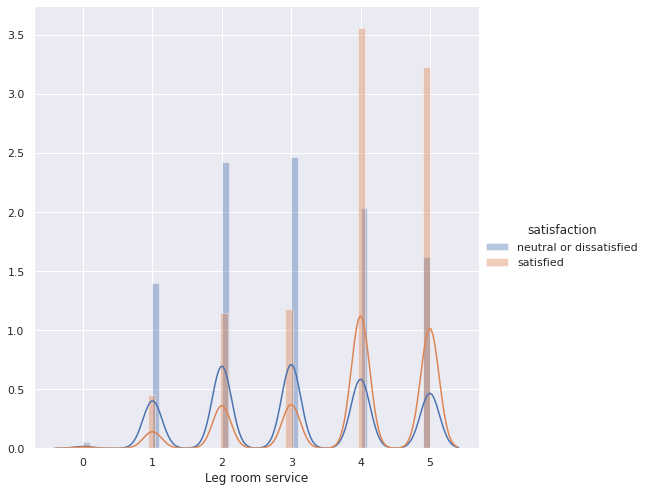

In [114]:
sns.FacetGrid(df, hue='satisfaction', height=7).map(sns.distplot, 'Leg room service').add_legend()

- Пассажиры, поставившие 1-3 за эту характеристику примерно в 2 раза чаще останутся недовольными
- Пассажиры, поставившие 4-5 более, чем в 2 раза чаще оказываются довольны полетом

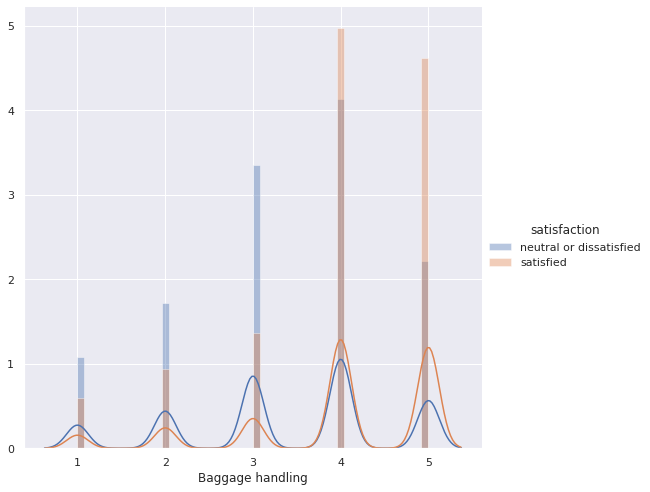

In [115]:
sns.FacetGrid(df, hue='satisfaction', height=7).map(sns.distplot, 'Baggage handling').add_legend()

- Пассажиры, поставившие 1-3 за эту характеристику примерно в 2 раза чаще останутся недовольными
- Пассажиры, поставившие 4 более, немного чаще оказываются довольны полетом
- Пассажиры, поставившие 5 более, чем в 2 раза чаще оказываются довольны полетом

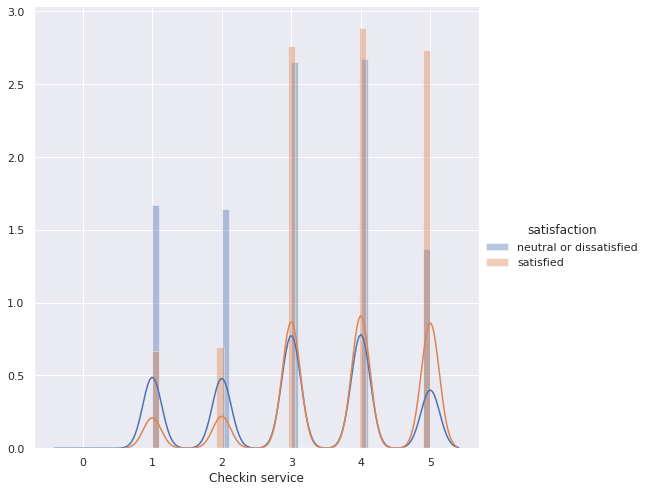

In [116]:
sns.FacetGrid(df, hue='satisfaction', height=7).map(sns.distplot, 'Checkin service').add_legend()

- Пассажиры, поставившие 1-2 за эту характеристику более чем в 2 раза чаще останутся недовольными
- Пассажиры, поставившие 5 более, чем в 2 раза чаще оказываются довольны полетом

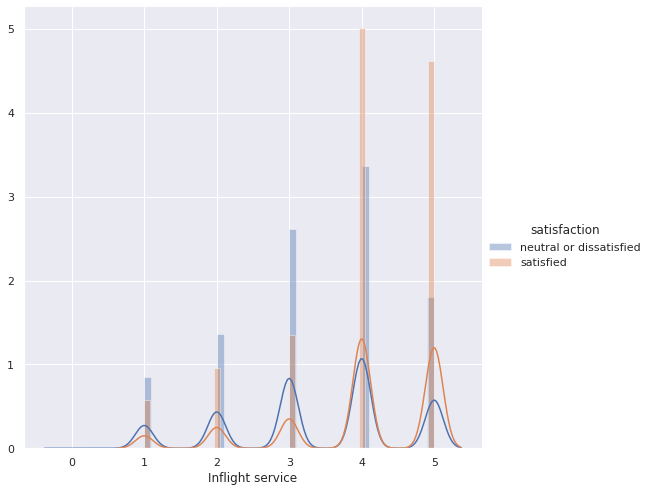

In [117]:
sns.FacetGrid(df, hue='satisfaction', height=7).map(sns.distplot, 'Inflight service').add_legend()

- Пассажиры, поставившие 1-3 чаще остаются недовольными
- Пассажиры, поставившие 4 или 5 более, чаще оказываются довольны

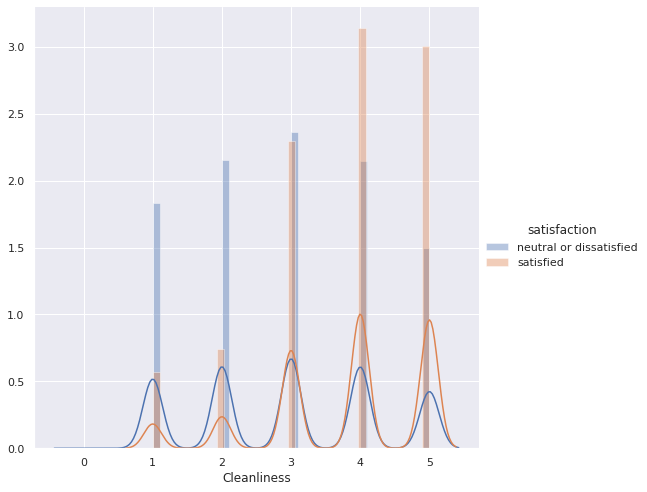

In [118]:
sns.FacetGrid(df, hue='satisfaction', height=7).map(sns.distplot, 'Cleanliness').add_legend()

- Пассажиры, поставившие 1-3 чаще остаются недовольными
- Пассажиры, поставившие 5 более, чаще оказываются довольны

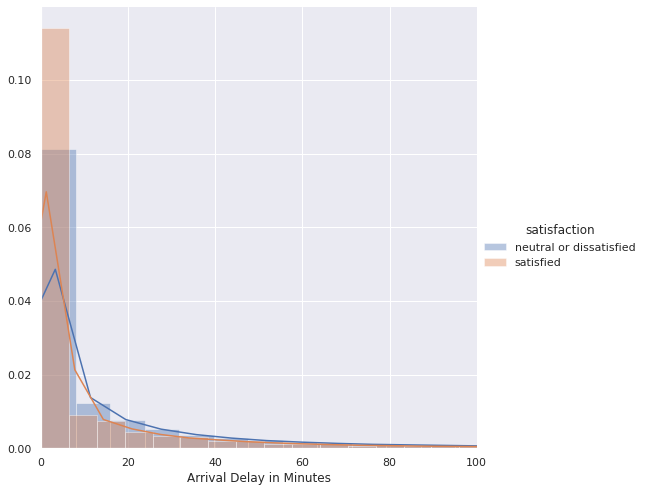

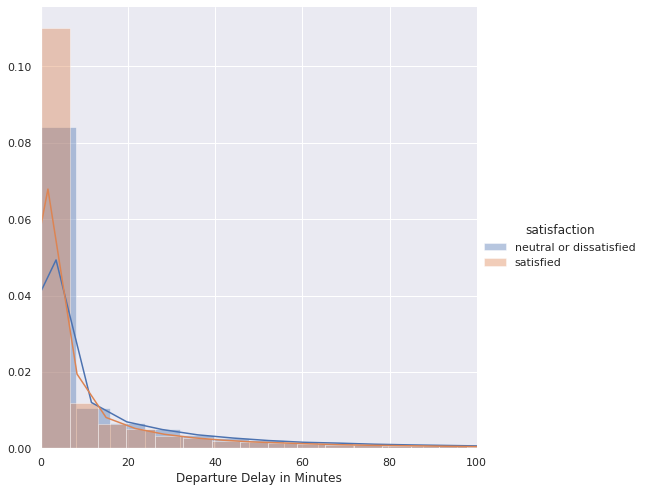

In [119]:
sns.FacetGrid(df, hue='satisfaction', height=7, xlim=(0, 100)).map(sns.distplot, 'Arrival Delay in Minutes', bins=200).add_legend()
sns.FacetGrid(df, hue='satisfaction', height=7, xlim=(0, 100)).map(sns.distplot, 'Departure Delay in Minutes', bins=200).add_legend()

На графике задержки прибытия видно, что уже во втором и всех последующих бинах гистограммы значительно больше недовольных.
На графике задержки отправки ситуация несколько мягче: в первых двух бинах большее довольных, а в последующих не такая большая разница между довольными и недовольными. Т.е. пассажиры, терпимее относятся к задержке отправки, чем к задержке прибытия, что вполне логчно. Значит задержка отправки для нас менее информативна, если отбрасывать из двух.

Также рискну предположить что "переход" в районе 1-го бакета гистограммы с удвлетвоенного на не удовлетворенного происхоит из-за самого факта задержки.
Для проверки того построим гистограммы распределения удовлеторенных и неудовлетворенных пассажиров для данных с задержкой и без.

Text(0.5, 1.0, 'Non-zero arrival delay')

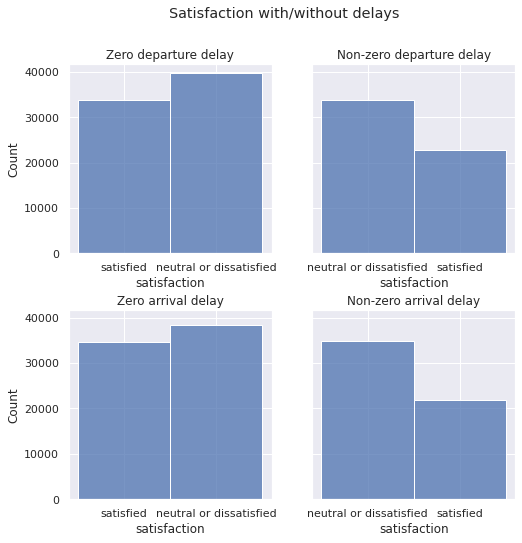

In [120]:
zero_departure_delay = df[df['Departure Delay in Minutes'] == 0]
non_zero_departure_delay = df[df['Departure Delay in Minutes'] > 0]
zero_arrival_delay = df[df['Arrival Delay in Minutes'] == 0]
non_zero_arrival_delay = df[df['Arrival Delay in Minutes'] > 0]

fig, ax = plt.subplots(2, 2, sharey=True, figsize=(8, 8))
fig.suptitle('Satisfaction with/without delays')
fig.subplots_adjust(hspace = 0.3)
sns.histplot(x='satisfaction', data=zero_departure_delay, ax=ax[0, 0])
ax[0,0].set_title('Zero departure delay')
sns.histplot(x='satisfaction', data=non_zero_departure_delay, ax=ax[0, 1])
ax[0,1].set_title('Non-zero departure delay')
sns.histplot(x='satisfaction', data=zero_arrival_delay, ax=ax[1, 0])
ax[1,0].set_title('Zero arrival delay')
sns.histplot(x='satisfaction', data=non_zero_arrival_delay, ax=ax[1, 1])
ax[1,1].set_title('Non-zero arrival delay')

- Видно, что среди рейсов без задержки отправки/прибытия удовлетворенных клиентов больше, чем среди рейсов с задержкой. 
- Кроме того распределения для задерки отправки и задержки прибытия почти одинаковы, что лишний раз свидетельствует о том, что одну из переменных можно отбросить.

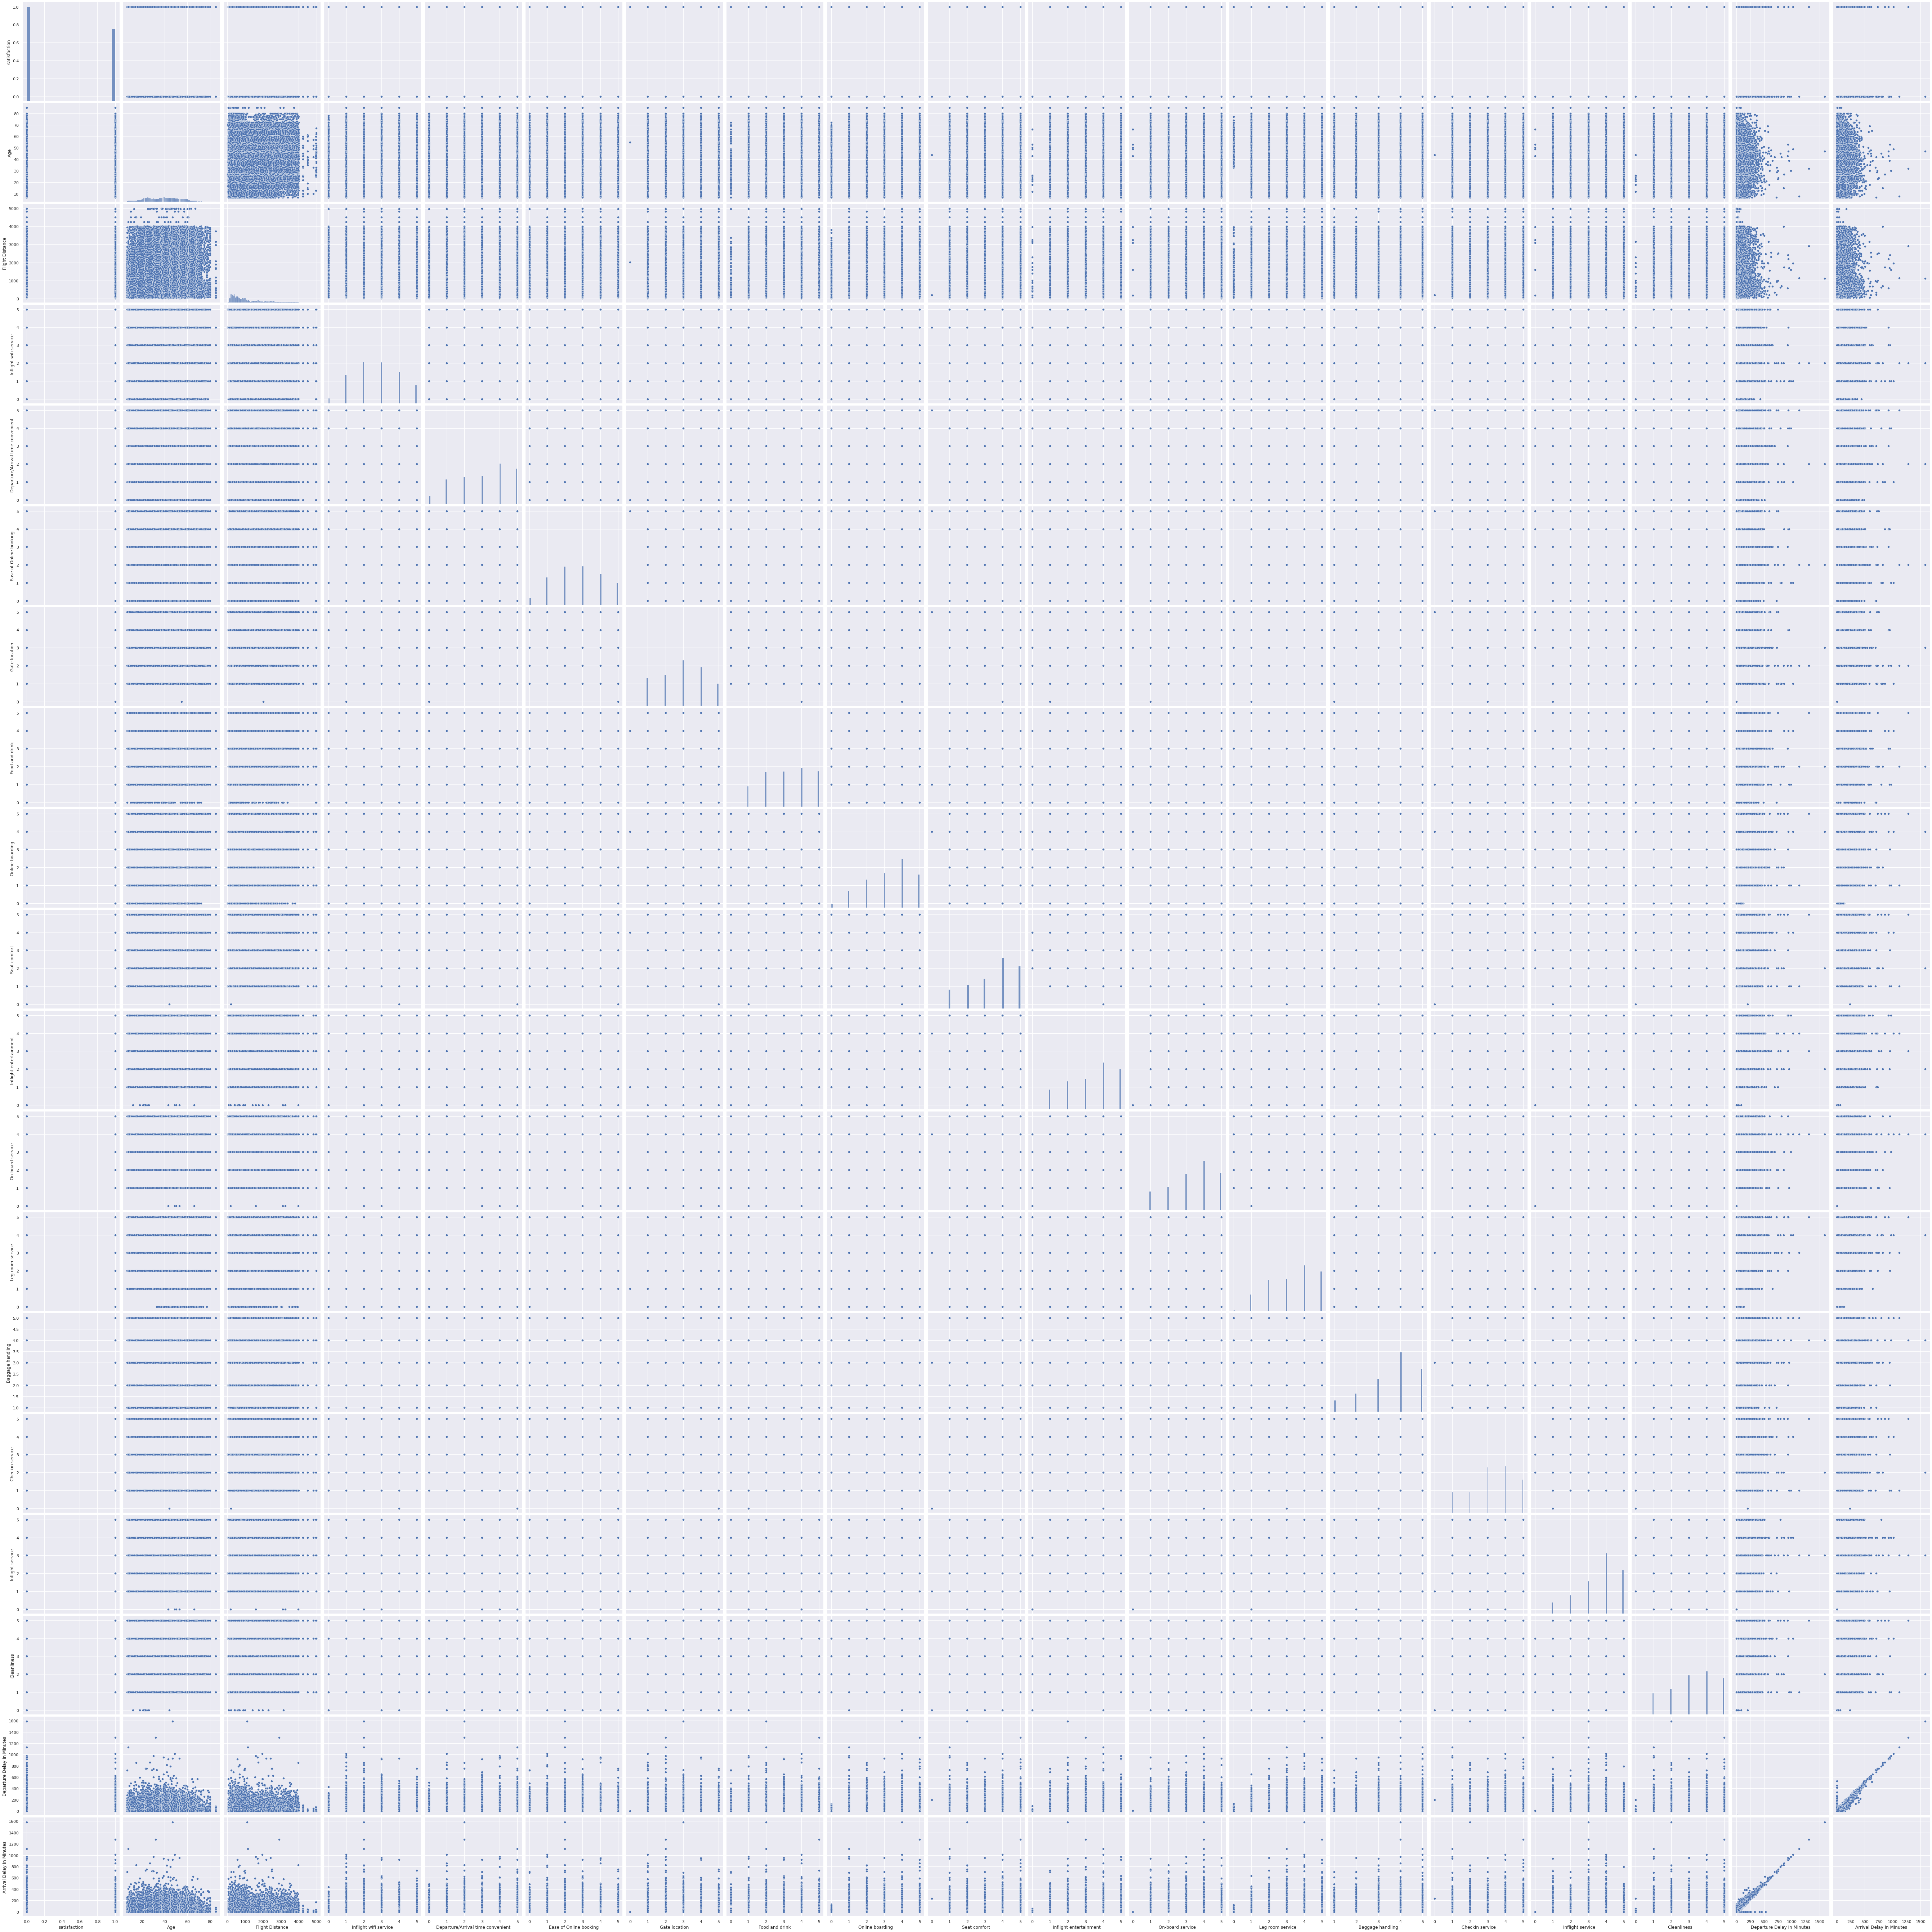

In [121]:
numerical_cols = list(df_numerical.dtypes[df_numerical.dtypes != 'object'].index)

numerical_cols.remove('satisfaction')
numerical_cols.insert(0, 'satisfaction')

pp = sns.pairplot(df_numerical[numerical_cols], height=4)
pp.fig.savefig('pairplot.png')

- Видна явная линейная зависимость видна между задержкой вылета 'Departure Delay in Minutes' и задержкой прибытия 'Arrival Delay in Minutes'. Большее зависимостй не наблюдается.
- Так же видны выбросы для задержкек вылета прибытия

Cоберем статистику по количеству полетов с задержкой больше каждой величины кратной 100 со 100 до 1600

In [122]:
stats = []
for i in range(1, 17):
    min_delay = i * 100
    count = (df['Arrival Delay in Minutes'] > i * 100).sum()
    stats.append([min_delay, count, count / len(df) * 100])
pd.DataFrame(stats, columns=['Min delay', 'Count', 'Percent'])

,Min delay,Count,Percent
0,100,4404,3.390822
1,200,988,0.760702
2,300,311,0.239452
3,400,113,0.087003
4,500,41,0.031568
5,600,25,0.019249
6,700,19,0.014629
7,800,12,0.009239
8,900,9,0.006929
9,1000,4,0.003080


Видно, что рейсы с задержками прибытия более чем на 400 минут составляют порядка менее десятой доли процента. Отбросим все что больше или равно 400 ?? считая выбросами.

In [123]:
df = df[df['Arrival Delay in Minutes'] <= 400]
df = df[df['Departure Delay in Minutes'] <= 400]

Расчет корреляционной матрицы

<AxesSubplot:>

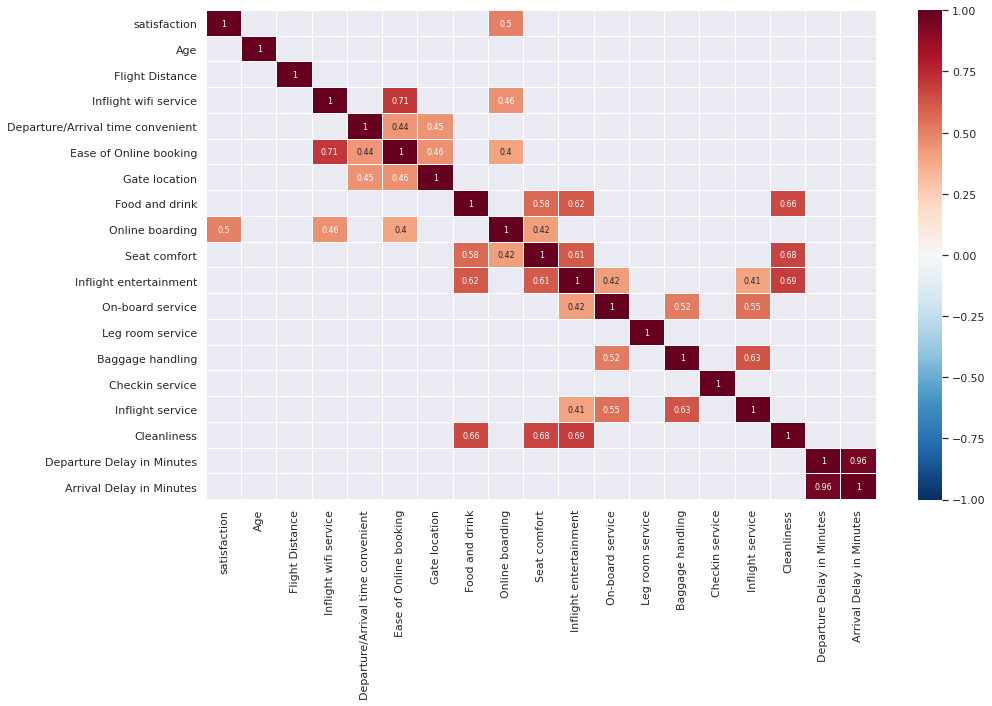

In [124]:
corr_mat = df_numerical.corr()
plt.subplots(figsize=(15,9))
sns.heatmap(corr_mat[np.abs(corr_mat) >= 0.4], 
            cmap='RdBu_r',
            vmax=1.0, vmin=-1.0,
            linewidth=0.1,
            annot=True,
            annot_kws={"size":8})

In [125]:
row = corr_mat.iloc[0].abs()
row = row.sort_values(axis='index', ascending=False)
row[row > 0.3]

satisfaction              1.000000
Online boarding           0.501749
Inflight entertainment    0.398234
Seat comfort              0.348829
On-board service          0.322205
Leg room service          0.312424
Cleanliness               0.307035
Name: satisfaction, dtype: float64

Рассморим подробее корреляцию целевой перемнной от входных числовых. Видно, что целевая переменная 'satisfaction' имеет среднюю корреляцию с единственной независимой переменной 'Online-boarding', а также слабо коррелирована с еще 5-ю еременными: 'Inflight entertainment', 'Seat comfort', 'On-board service', 'Leg room service', 'Cleanliness'

### Категориальные признаки

Построим распределение категориальных признаков

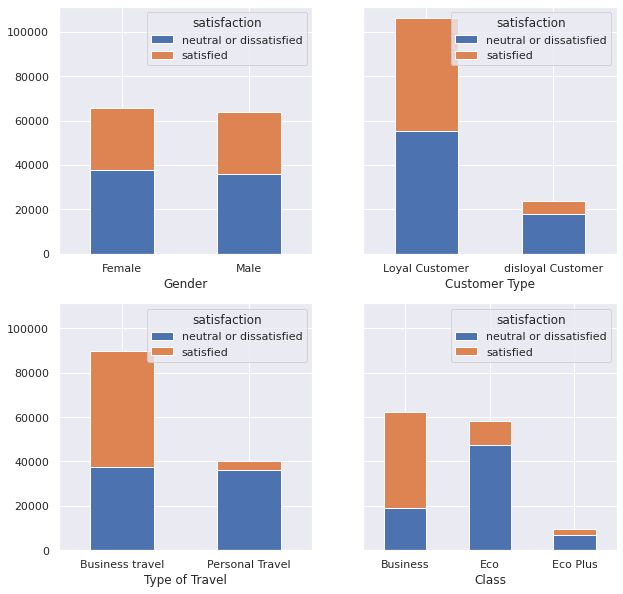

In [126]:
categorical_cols = list(df.dtypes[df.dtypes == 'object'].index) 
categorical_cols.remove('satisfaction')

fig, ax = plt.subplots(2, 2, figsize=(10, 10), sharey=True)
for i, name in enumerate(categorical_cols):
    df_plot = df.groupby(['satisfaction', name]).size().reset_index().pivot(columns='satisfaction', index=name, values=0)
    p = df_plot.plot(kind='bar', stacked=True, ax=ax[i//2, i%2])
    p.set_xticklabels(p.get_xticklabels(), rotation = 0)

- Пассажиров мужского и женского рода примерно одинаковое число, кроме того, в обоих классах распределение довольных/недовольных примерно 45/55, похоже это не очень информативный признак
- Лояльных клиентов значительно больше, чем нелояльных, среди лояльных половина довольны, остальные - нет, среди нелояльных значительно больше недовольных
- Гораздо чаще совершаются деловые поездки, чем индивидуальные перелеты. Среди пассаижиров, совершающих деловую поездку немного больше довольых.
Пассажиры, путешествущие "для себя" в абсолютном большинстве случаев оказываются недовольны перелетом
- Пассажиров, летящих бизнес классом чуть-чуть больше, чем летящих в эконом классе. В клсс эко-плюс летает очень мало пассажиров. Причем довольных в бизнес-классе примерно в 3 раза больше. В эко и эко-плюс ситуация прямо противоположная -- там абсоютное большинство пассжиров недовоьны перелетом

Рассморим теперь корреляцию целевой перемнной от входных категориалных

In [127]:
df_categorical = df.select_dtypes([object])
df_categorical = df_categorical[['satisfaction', 'Gender', 'Customer Type', 'Type of Travel', 'Class']]

Для категориальных переменных сущестут аналог корреляции -- Cramér's V,
а так же коэффицент неопределенности Theil's U, показывающий насколько хорошо мы можем предсказать одну переменную, учитывая другую.

- [Суть](https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9)
- [Реализация Cramér's V](https://stackoverflow.com/questions/46498455/categorical-features-correlation/46498792#46498792)
- [Реализация Theil's U](https://stackoverflow.com/questions/54931514/theils-u-1-theils-u-2-forecast-coefficient-formula-in-python)

In [128]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

def conditional_entropy(x,y):
    y_counter = Counter(y)
    xy_counter = Counter(list(zip(x,y)))
    total_occurrences = sum(y_counter.values())
    entropy = 0
    for xy in xy_counter.keys():
        p_xy = xy_counter[xy] / total_occurrences
        p_y = y_counter[xy[1]] / total_occurrences
        entropy += p_xy * math.log(p_y/p_xy)
    return entropy

def theils_u(x, y):
    s_xy = conditional_entropy(x,y)
    x_counter = Counter(x)
    total_occurrences = sum(x_counter.values())
    p_x = list(map(lambda n: n/total_occurrences, x_counter.values()))
    s_x = ss.entropy(p_x)
    if s_x == 0:
        return 1
    else:
        return (s_x - s_xy) / s_x

def apply(df, f):
    n = df.shape[1]
    mat = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            mat[i][j] = f(df[df.columns[i]], df[df.columns[j]])
    ndf = pd.DataFrame(mat, index=df.columns, columns=df.columns)
    return ndf

Расчитаем "корреляционную" матрицу для категориальных признаков

<AxesSubplot:>

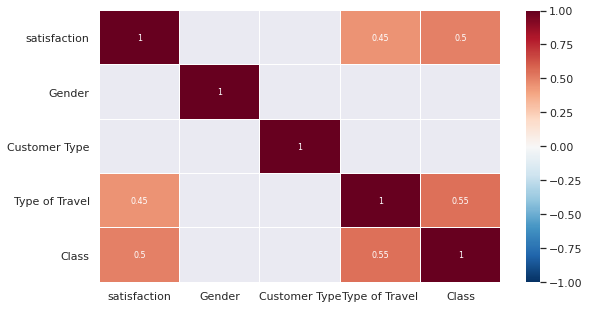

In [129]:
cramers_v_mat = apply(df_categorical[:df.shape[0]], cramers_v)

corr_mat = df_numerical.corr()
plt.subplots(figsize=(9,5))
sns.heatmap(cramers_v_mat[(cramers_v_mat >= 0.4) | (cramers_v_mat < -0.4)], 
            cmap='RdBu_r',
            vmax=1.0, vmin=-1.0,
            linewidth=0.1,
            annot=True,
            annot_kws={"size":8})

In [130]:
row = cramers_v_mat.iloc[0]
row.sort_values(axis='index', ascending=False).head()

satisfaction      0.999984
Class             0.503434
Type of Travel    0.449829
Customer Type     0.186026
Gender            0.010944
Name: satisfaction, dtype: float64

Рассморим подробее корреляцию целевой перемнной от входных категориальных. Видно, что целевая переменная 'satisfaction' имеет среднюю корреляцию с единственной независимой переменной 'Class' и 'Type of Travel', а также довольно слабо коррелирована переменной с 'Customer Type'

Расчитаем коэффиценты неопределенности

<AxesSubplot:>

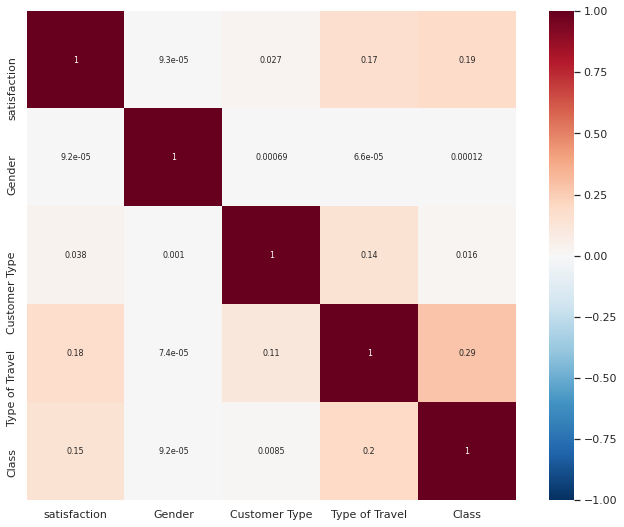

In [131]:
theils_u_mat = apply(df_categorical, theils_u)

f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(theils_u_mat, square=True, annot=True, vmax=1.0, vmin=-1.0, cmap='RdBu_r', annot_kws={"size":8})

По исследованию коэффициентов неопределенности нельзя отметить сильного влияния категориальных переменных друг на друга.
Итого, судя по всему, все категориальные переменные достаточно (линейно) независимы друг от друга.

- Возможно стоит сгенерировать такие признаки как "общее удовлетворение сервисом на борту", "общее удовлетворение сервисом на онлайн" и "общее удовлетворение сервисом в аэропорту" как среднее касающихся этих признаков ценок.
- Также возможно стот добавить признак-флаг, говорящий была ли хоть какая-нибудь задержка прибытия

In [132]:
df['Overall Satisfaction on board'] = 0.125 * (df['Inflight wifi service'] + df['Food and drink'] + df['Seat comfort'] + df['Inflight entertainment'] + df['On-board service'] + df['Leg room service'] +  df['Inflight service'] +  df['Cleanliness'])
df['Overall Satisfaction online'] = 0.5 * (df['Online boarding'] + df['Ease of Online booking'])
df['Overall Satisfaction airport'] = 1/3 * (df['Gate location'] + df['Baggage handling'] + df['Checkin service'])

df['Arrival delayed'] = (df['Arrival Delay in Minutes'] > 0).astype('int')

Т.о. наиболее информатиыными признаками будут:
- 'Class', 'Type of Travel' -- категориальные;
- 'Online boarding', 'Inflight entertainment', 'Seat comfort', 'On-board service', 'Leg room service', 'Cleanliness', 'Arrival delayed' -- числовые

Пока так, дальше методом проб и ошибок по резульатам обучения моделей

## Преобразование данных

Проверим имеют ли числовые переменные перекос

In [133]:
numeric_feats = df.dtypes[df.dtypes != "object"].index
skewed_feats = df[numeric_feats].apply(lambda x: ss.skew(x.dropna())).sort_values(ascending=False)
print("\nПерекос в численных признаках: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness


Перекос в численных признаках: 



,Skew
Departure Delay in Minutes,4.382977
Arrival Delay in Minutes,4.362158
Flight Distance,1.108404
Arrival delayed,0.256790
Inflight wifi service,0.040248
Age,-0.003765
Ease of Online booking,-0.018879
Gate location,-0.058289
Food and drink,-0.155029
Overall Satisfaction airport,-0.221330


Несколько признаков имеют значительный перекос, скорректируем его с помощью преобразования Бокса-Кокса

In [134]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    df[feat] = boxcox1p(df[feat], lam)
df

There are 22 skewed numerical features to Box Cox transform


,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Overall Satisfaction on board,Overall Satisfaction online,Overall Satisfaction airport,Arrival delayed
0,Male,Loyal Customer,3.237728,Personal Travel,Eco Plus,10.062098,1.540963,1.820334,1.540963,0.730463,...,1.820334,2.055642,2.055642,4.201461,3.701973,neutral or dissatisfied,1.912903,1.540963,1.540963,0.730463
1,Male,disloyal Customer,4.201461,Business travel,Business,8.463564,1.540963,1.194318,1.540963,1.540963,...,0.730463,1.820334,0.730463,0.730463,2.259674,neutral or dissatisfied,1.242600,1.540963,1.319540,0.730463
2,Female,Loyal Customer,4.263161,Business travel,Business,12.503049,1.194318,1.194318,1.194318,1.194318,...,1.820334,1.820334,2.055642,0.000000,0.000000,satisfied,1.851827,1.687259,1.640101,0.000000
3,Female,Loyal Customer,4.201461,Business travel,Business,10.571259,1.194318,2.055642,2.055642,2.055642,...,0.730463,1.820334,1.194318,3.011340,2.750250,neutral or dissatisfied,1.420659,1.687259,1.540963,0.730463
4,Male,Loyal Customer,5.714669,Business travel,Business,8.253529,1.540963,1.540963,1.540963,1.540963,...,1.540963,1.540963,1.540963,0.000000,0.000000,satisfied,1.687259,1.820334,1.640101,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,Male,disloyal Customer,4.697012,Business travel,Business,10.401243,1.540963,1.540963,1.540963,0.730463,...,1.820334,2.055642,1.820334,0.000000,0.000000,neutral or dissatisfied,1.721663,1.540963,1.540963,0.000000
129876,Male,Loyal Customer,4.071754,Business travel,Business,10.934619,1.820334,1.820334,1.820334,1.820334,...,2.055642,2.055642,1.820334,0.000000,0.000000,satisfied,1.882674,1.820334,1.981178,0.000000
129877,Female,Loyal Customer,3.618223,Personal Travel,Eco,11.601372,1.194318,2.055642,0.730463,2.055642,...,2.055642,1.820334,1.194318,0.000000,0.000000,neutral or dissatisfied,1.420659,0.730463,1.981178,0.000000
129878,Male,Loyal Customer,3.340760,Business travel,Business,12.465101,1.540963,1.540963,1.540963,1.540963,...,1.820334,2.055642,1.820334,0.000000,0.000000,satisfied,1.721663,1.687259,1.820334,0.000000


Также перед обучением моделей необходимо нормализовать числовые данные, а категориальные переменные заменить на бинарные признаки при помощи One hot encoding

In [135]:
from sklearn import preprocessing

numerical_col = ['Online boarding', 'Inflight entertainment', 'Seat comfort', 'On-board service', 'Leg room service', 'Cleanliness', 'Arrival delayed']
categorical_col = ['Class', 'Type of Travel']

scaler = preprocessing.StandardScaler().fit(df[numerical_col])

t = scaler.transform(df[numerical_col])

y = df['satisfaction'].map({'neutral or dissatisfied' : 0, 'satisfied' : 1})
categorical_X = pd.get_dummies(df[categorical_col])
numerical_X = pd.DataFrame(t, columns=numerical_col, index=categorical_X.index)

X = pd.concat([categorical_X, numerical_X], axis=1)

train_slice = slice(0, n_train)
test_slice = slice(n_train, n_train + n_test)

x_train = X[train_slice].reset_index()
y_train = y[train_slice].reset_index()

x_test = X[test_slice].reset_index()
y_test = y[test_slice].reset_index()